# Удаление выбросов и NA. Основные распределения статистики.

# 1

In [17]:
import pandas as pd  # Библиотека pandas для работы с индексированными таблицами
import numpy as np
import matplotlib.pyplot as plt  
import scipy.stats as st
import sympy as sp
from openpyxl import load_workbook
from scipy.optimize import minimize
# Прочитаем книгу 'Удаление_NA_Out.xlsx' с исходными данными

df = pd.read_excel('Удаление_NA_Out.xlsx')
df

,A,B,C,D,E,F,G,H
0,196.92971,203.29,-173.6,222.553,200.248,Jun,E,No
1,150.50897,198.23,-225.9,224.344,NaN,Apr,C,Yes
2,NaN,260.40,-170.4,245.684,199.434,Mch,B,No
3,196.34805,217.22,-232.5,225.249,157.329,Feb,A,No
4,199.53462,205.53,-177.4,243.334,227.758,Mch,E,No
...,...,...,...,...,...,...,...,...
1995,180.66118,218.83,-212.7,NaN,204.273,NaN,C,NaN
1996,197.28935,NaN,-203.9,NaN,197.449,NaN,NaN,NaN
1997,160.83379,NaN,-202.8,NaN,193.889,NaN,NaN,NaN
1998,216.67462,NaN,NaN,NaN,204.405,NaN,NaN,NaN


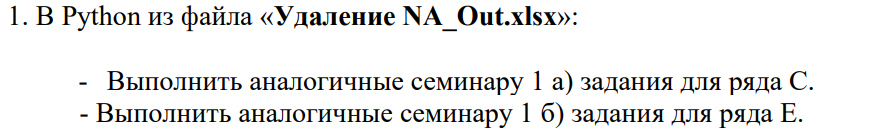

In [2]:
def remove_outlier(col_name:pd.Series,prin=True):

    col_name = col_name.dropna()
    Q1 = col_name.quantile(0.25)
    Q3 = col_name.quantile(0.75)
    RQ = Q3-Q1 #Interquartile range
    IRQ=1.5*RQ
    Xst_min  = Q1-IRQ
    Xst_max = Q3+IRQ
    if prin:
        print('N_with_NA=', col_name.size)
        print('N_NA=', col_name.isna().sum())
        print('Первый квартиль Q1 выборки А=:', Q1)
        print('Третий квартиль Q3 выборки А=:', Q3)
        print('RQ=',RQ)
        print('Xst_min=',Xst_min)
        print('Xst_max=',Xst_max)
        print('N_without_NA=',col_name.count())
    df_out =col_name[(Xst_min <= col_name) & (col_name <= Xst_max)]
    return df_out

N_with_NA= 1969
N_NA= 0
Первый квартиль Q1 выборки А=: -210.1
Третий квартиль Q3 выборки А=: -180.8
RQ= 29.299999999999983
Xst_min= -254.04999999999995
Xst_max= -136.85000000000002
N_without_NA= 1969


0      -173.6
1      -225.9
2      -170.4
3      -232.5
4      -177.4
        ...  
1993   -205.1
1994   -202.4
1995   -212.7
1996   -203.9
1997   -202.8
Name: C, Length: 1943, dtype: float64

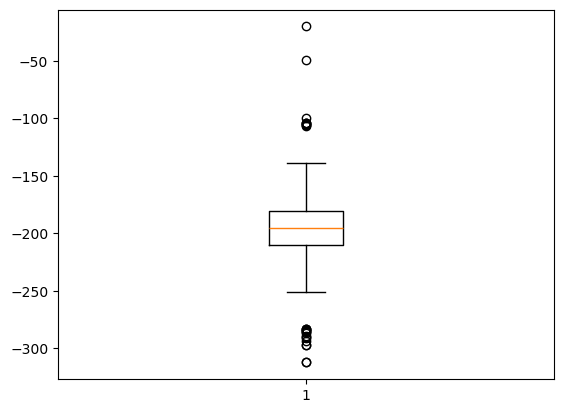

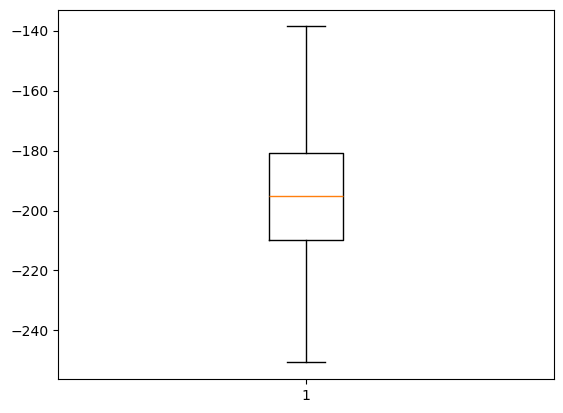

C:\Users\ivant\AppData\Local\Temp\ipykernel_21892\1920886480.py:45: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


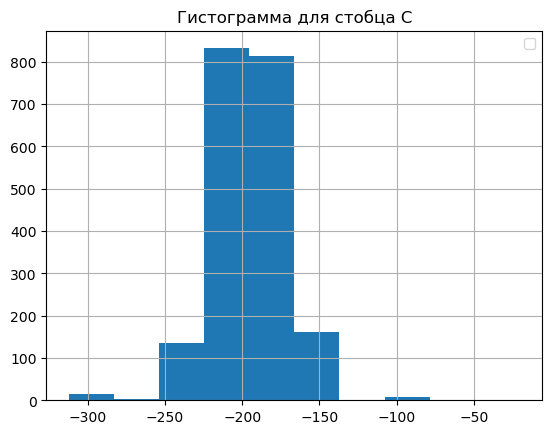

In [3]:
df_out_C=remove_outlier(df.C)
display(df_out_C)
print('\n\n')


df.C.describe()
print('\n\n')


df_C=np.array(df.C[df.C.isna()== False])
df_out_C=np.array(remove_outlier(df.C,False))
mr_out=len(df_out_C)
mr_out

plt.boxplot(df_C)
plt.show()
plt.boxplot(df_out_C)
plt.show()


wb = load_workbook('Удаление_NA_Out.xlsx')
wb.create_sheet('C (Python)')
ws1 = wb['Данные']
ws2 = wb['C (Python)']
mr = ws1.max_row

for i in range (1, mr + 1):
    c = ws1.cell(row = i, column = 1) 
    ws2.cell(row = i, column = 1).value = c.value

ws2.cell(row = 1, column = 3).value="Без NA"

for i in range (1, len(df_C)+1 ):
    ws2.cell(row = i+1, column = 3).value = df_C[i-1]

ws2.cell(row = 1, column = 5).value="Без NA и выбросов"
for i in range (1, mr_out+1 ):
    ws2.cell(row = i+1, column = 5).value = sorted(df_out_C)[i-1]
    
wb.save('Удаление_NA_Out.xlsx')

wb.close()

df.C.hist()
plt.legend()
plt.title('Гистограмма для стобца C')
plt.show()

N_with_NA= 1971
N_NA= 0
Первый квартиль Q1 выборки А=: 175.7525
Третий квартиль Q3 выборки А=: 203.56799999999998
RQ= 27.815499999999986
Xst_min= 134.02925000000002
Xst_max= 245.29124999999996
N_without_NA= 1971


0       200.248
2       199.434
3       157.329
4       227.758
5       185.213
         ...   
1994    149.428
1995    204.273
1996    197.449
1997    193.889
1998    204.405
Name: E, Length: 1959, dtype: float64

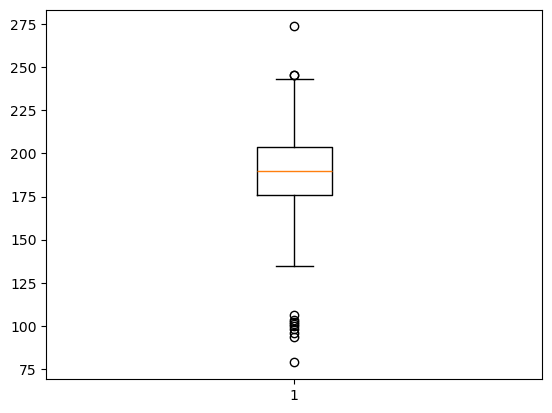

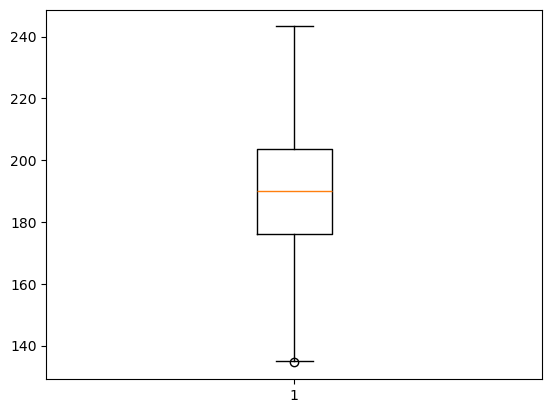

C:\Users\ivant\AppData\Local\Temp\ipykernel_21892\1872110326.py:47: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


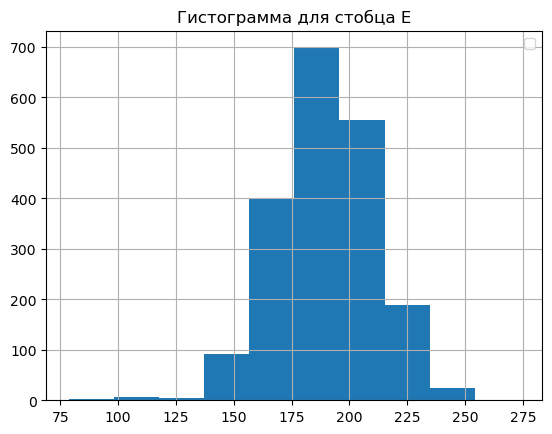

In [4]:
df.E = df.E[df.E != 'ops'].astype(np.float64)
df_out_E=remove_outlier(df.E)
display(df_out_E)
print('\n\n')


df.E.describe()
print('\n\n')


df_E=np.array(df.E[df.E.isna()== False])
df_out_E=np.array(remove_outlier(df.E,False))
mr_out=len(df_out_E)
mr_out

plt.boxplot(df_E)
plt.show()
plt.boxplot(df_out_E)
plt.show()


wb = load_workbook('Удаление_NA_Out.xlsx')
wb.create_sheet('E (Python)')
ws1 = wb['Данные']
ws2 = wb['E (Python)']
mr = ws1.max_row

for i in range (1, mr + 1):
    c = ws1.cell(row = i, column = 1) 
    ws2.cell(row = i, column = 1).value = c.value

ws2.cell(row = 1, column = 3).value="Без NA"

for i in range (1, len(df_E)+1 ):
    ws2.cell(row = i+1, column = 3).value = df_E[i-1]

ws2.cell(row = 1, column = 5).value="Без NA и выбросов"
for i in range (1, mr_out+1 ):
    ws2.cell(row = i+1, column = 5).value = sorted(df_out_E)[i-1]
    
wb.save('Удаление_NA_Out.xlsx')

wb.close()


df.E.hist()
plt.legend()
plt.title('Гистограмма для стобца E')
plt.show()

# 2

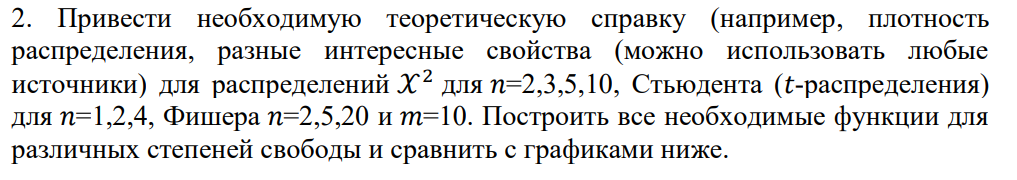

# Распределение хи-квадрат

## Введение

Распределение хи-квадрат ($\chi^2$-распределение) возникает при суммировании квадратов независимых нормально распределённых случайных величин и имеет широкое применение в статистике, особенно в проверке гипотез.

## Определение

Распределение хи-квадрат с $k$ степенями свободы — это распределение суммы квадратов $k$ независимых стандартных нормально распределённых случайных величин. Если $Z_1, Z_2, \ldots, Z_k \sim N(0,1)$, то случайная величина

$$
X = \sum_{i=1}^{k} Z_i^2
$$

имеет распределение $\chi^2$ с $k$ степенями свободы.

## Плотность распределения

Плотность вероятности для распределения $\chi^2$ с $k$ степенями свободы:

$$
f(x; k) = \frac{1}{2^{k/2} \Gamma(k/2)} x^{k/2 - 1} e^{-x/2}, \quad x > 0,
$$

где $\Gamma(k/2)$ — гамма-функция.

## Моменты

Распределение $\chi^2$ имеет следующие характеристики:

- Математическое ожидание: $\mathbb{E}[X] = k$
- Дисперсия: $\text{Var}(X) = 2k$
- Асимметрия: $\gamma_1 = \frac{2}{\sqrt{k}}$
- Эксцесс: $\gamma_2 = \frac{12}{k}$

## Свойства

- Если $X_1 \sim \chi^2(k_1)$ и $X_2 \sim \chi^2(k_2)$, то их сумма $X_1 + X_2 \sim \chi^2(k_1 + k_2)$.
- Для больших $k$ распределение $\chi^2(k)$ приближается к нормальному $N(k, 2k)$.

## Применения

Распределение хи-квадрат используется в:

- Хи-квадрат тесте на согласие
- Проверке гипотез о дисперсиях


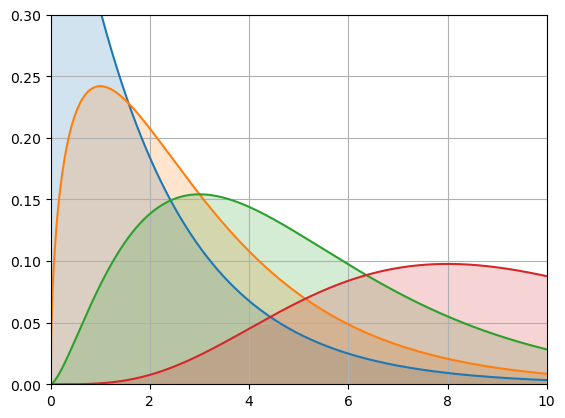

In [5]:
xlims = (0,10)
ylims = (0,0.3)
ns = [2,3,5,10]
func = st.chi2

fig,ax=plt.subplots(1,1)
x = np.linspace(xlims[0],xlims[1],1000)
ax.grid('ON')
ax.set_ylim(ylims)
ax.set_xlim(xlims)


mx = [[func(j).pdf(i) for i in x] for j in ns]


for i in mx:
  ax.plot(x,i)
  ax.fill_between(x,i, alpha=0.2)

# Распределение Стьюдента

## Введение

Распределение Стьюдента возникает в статистике, когда мы оцениваем параметры нормального распределения при неизвестной дисперсии. Оно особенно полезно при работе с небольшими выборками и широко используется в t-тестах для проверки гипотез.

## Определение

Распределение Стьюдента с $ k $ степенями свободы описывается случайной величиной:

$$
T = \frac{Z}{\sqrt{X/k}},
$$

где:
- $ Z \sim N(0, 1) $ — стандартная нормально распределённая случайная величина,
- $ X \sim \chi^2(k) $ — случайная величина, имеющая распределение хи-квадрат с  $ k $ степенями свободы.

## Плотность распределения

Плотность вероятности для распределения Стьюдента с $k$ степенями свободы задаётся формулой:

$$
f(t; k) = \frac{\Gamma \left( \frac{k+1}{2} \right)}{\sqrt{k\pi} \Gamma \left( \frac{k}{2} \right)} \left( 1 + \frac{t^2}{k} \right)^{-\frac{k+1}{2}},
$$

где $ \Gamma(\cdot) $ — гамма-функция.

## Моменты

Распределение Стьюдента имеет следующие моменты (в зависимости от числа степеней свободы \( k \)):

- Математическое ожидание: $ \mathbb{E}[T] = 0 $ для $ k > 1 $,
- Дисперсия: $ \text{Var}(T) = \frac{k}{k - 2} $ для $ k > 2 $,
- Асимметрия: распределение симметрично, поэтому $ \gamma_1 = 0 $,
- Эксцесс: коэффициент эксцесса $ \gamma_2 = \frac{6}{k - 4} $ для $ k > 4 $.

## Свойства

- Распределение Стьюдента симметрично и имеет более "тяжёлые хвосты", чем нормальное распределение. Это значит, что при небольших значениях $ k $ оно лучше учитывает экстремальные значения.
- При $ k \to \infty $ распределение Стьюдента стремится к стандартному нормальному распределению $ N(0, 1) $.
- Используется в t-тестах для проверки гипотез о равенстве средних при малых выборках и неизвестной дисперсии.

## Применения

Основные применения распределения Стьюдента:
- t-тест для одной выборки: проверка гипотезы о том, что среднее значение равно заданному числу,
- t-тест для двух независимых выборок: сравнение средних двух групп,
- Доверительные интервалы для средних значений при неизвестной дисперсии выборки.

## Заключение

Распределение Стьюдента является важным инструментом в статистике, особенно при работе с небольшими выборками. Оно позволяет учитывать неопределённость при оценке параметров нормального распределения и используется в широком спектре статистических тестов.


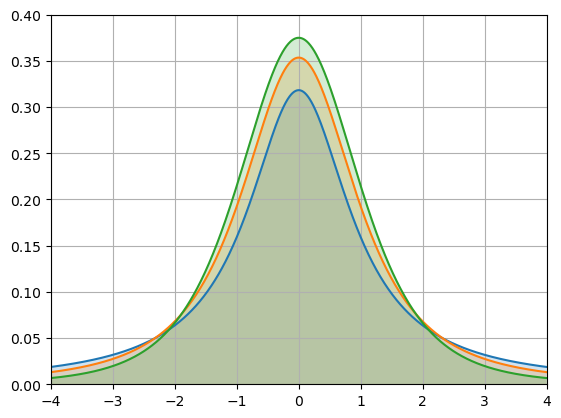

In [6]:
xlims = (-4,4)
ylims = (0,0.4)
ns = [1,2,4]
func = st.t

fig,ax=plt.subplots(1,1)
x = np.linspace(xlims[0],xlims[1],1000)
ax.grid('ON')
ax.set_ylim(ylims)
ax.set_xlim(xlims)


mx = [[func(j).pdf(i) for i in x] for j in ns]


for i in mx:
  ax.plot(x,i)
  ax.fill_between(x,i, alpha=0.2)

# F-распределение (Распределение Фишера)

## Введение

F-распределение, также известное как распределение Фишера–Снедекора, широко используется в статистике для анализа дисперсий (ANOVA) и сравнения моделей регрессии. Оно описывает отношение двух независимых случайных величин, имеющих хи-квадрат распределение, нормированных на степени свободы.

## Определение

Распределение Фишера с $ d_1 $ и $ d_2 $ степенями свободы определяется как отношение:

$$
F = \frac{(X_1 / d_1)}{(X_2 / d_2)},
$$

где:

- $ X_1 \sim \chi^2(d_1) $ — случайная величина, имеющая хи-квадрат распределение с $ d_1 $ степенями свободы,
- $ X_2 \sim \chi^2(d_2) $ — случайная величина, имеющая хи-квадрат распределение с $ d_2 $ степенями свободы,
- $ d_1 $ и $ d_2 $ — числа степеней свободы.

## Плотность распределения

Плотность вероятности для F-распределения с $ d_1 $ и $ d_2 $ степенями свободы задаётся следующей формулой:

$$
f(x; d_1, d_2) = \frac{\left(\frac{d_1}{d_2}\right)^{d_1/2} x^{(d_1/2) - 1}}{B(d_1/2, d_2/2) \left(1 + \frac{d_1}{d_2} x \right)^{(d_1 + d_2)/2}},
$$

где $ B(\cdot, \cdot) $ — бета-функция.

## Моменты

Моменты F-распределения зависят от степеней свободы $ d_1 $ и $ d_2 $:

- Математическое ожидание:

$$
\mathbb{E}[F] = \frac{d_2}{d_2 - 2}, \quad \text{при} \ d_2 > 2,
$$

- Дисперсия:

$$
\text{Var}(F) = \frac{2d_2^2 (d_1 + d_2 - 2)}{d_1 (d_2 - 2)^2 (d_2 - 4)}, \quad \text{при} \ d_2 > 4.
$$

## Свойства

- F-распределение асимметрично, особенно при малых значениях степеней свободы $ d_1 $ и $ d_2 $.
- При $ d_1 = d_2 = \infty $, распределение $ F $ стремится к 1.
- Если $ d_1 $ и $ d_2 $ велики, распределение Фишера приближается к нормальному распределению.

## Применения

F-распределение играет ключевую роль в статистике, и его основными применениями являются:

- **Дисперсионный анализ (ANOVA):** Используется для проверки гипотез о равенстве средних значений в нескольких группах.
- **Сравнение моделей регрессии:** Проверка значимости коэффициентов регрессии с помощью F-статистики.
- **Тесты на равенство дисперсий:** Проверка того, имеют ли две выборки одинаковую дисперсию.

## Заключение

Распределение Фишера является основным инструментом в анализе дисперсий и регрессионных моделях. Оно помогает анализировать отношения дисперсий и проводить статистические тесты, особенно в условиях, когда данные следуют нормальному распределению.


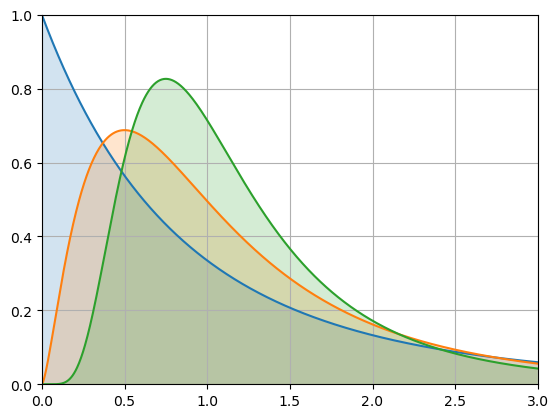

In [7]:
xlims = (0,3)
ylims = (0,1)
ns = [2,5,20]
m = 10
func = st.f

fig,ax=plt.subplots(1,1)
x = np.linspace(xlims[0],xlims[1],1000)
ax.grid('ON')
ax.set_ylim(ylims)
ax.set_xlim(xlims)


mx = [[func(j,m).pdf(i) for i in x] for j in ns]


for i in mx:
  ax.plot(x,i)
  ax.fill_between(x,i, alpha=0.2)

# 3

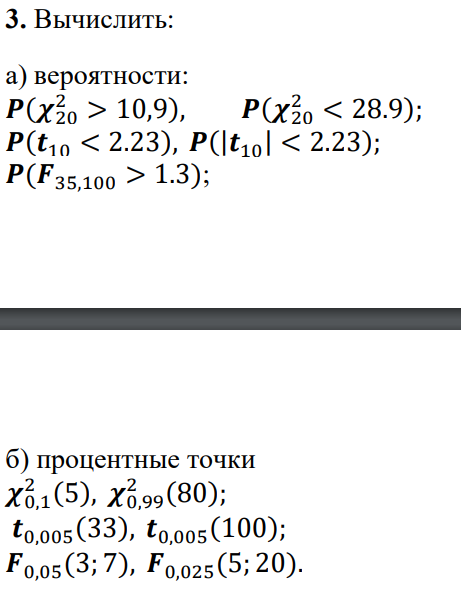

In [8]:
P = [1-st.chi2(20).cdf(10.9),
     st.chi2(20).cdf(28.9),
     st.t(10).cdf(2.23),
     st.t(10).cdf(2.23) - st.t(10).cdf(-2.23),
     1-st.f(35,100).cdf(1.3)
     ]
sus = [' P(χ²₂₀ > 10.9)', ' P(χ²₂₀ < 28.9)', ' P(t₁₀ < 2.23)', ' P(|t₁₀| < 2.23)', ' P(F₃₅', '₁₀₀ > 1.3)']


print(*zip(sus,P), sep='\n')

(' P(χ²₂₀ > 10.9)', 0.9487746849992853)
(' P(χ²₂₀ < 28.9)', 0.9102528687159303)
(' P(t₁₀ < 2.23)', 0.9750787646106596)
(' P(|t₁₀| < 2.23)', 0.9501575292213191)
(' P(F₃₅', 0.1575835371726052)


In [9]:
Percentiles = [
st.chi2(5).ppf(0.1),
st.chi2(80).ppf(0.99),
st.t(33).ppf(0.005),
st.t(100).ppf(0.005),
st.f(3,7).ppf(0.05),
st.f(5,20).ppf(0.025)
]
sis =[' χ²₀.₁ (5)', ' χ²₀.₉₉ (80)', ' t₀.₀₀₅ (33)', ' t₀.₀₀₅ (100)', ' F₀.₀₅ (3; 7)', ' F₀.₀₂₅ (5; 20)']
print(*zip(sis,Percentiles), sep='\n')

(' χ²₀.₁ (5)', 1.6103079869623227)
(' χ²₀.₉₉ (80)', 112.32879252029748)
(' t₀.₀₀₅ (33)', -2.733276642350758)
(' t₀.₀₀₅ (100)', -2.625890521438018)
(' F₀.₀₅ (3; 7)', 0.11252716602610759)
(' F₀.₀₂₅ (5; 20)', 0.15801394834141053)


# 4

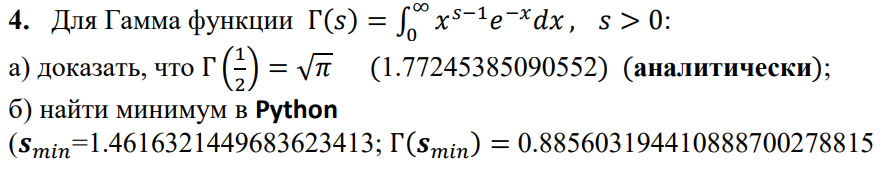

$$
\Gamma\big(1-x\big)\times\Gamma(x)=\frac{\pi}{sin(\pi x)}\\

\Gamma\bigg(\frac{1}{2}\bigg)\times\Gamma\bigg(\frac{1}{2}\bigg)=\Gamma^2\bigg(\frac{1}{2}\bigg)=\frac{\pi}{sin(\frac{\pi}{2} )}=\pi\\
\Downarrow\\
\Gamma\bigg(\frac{1}{2}\bigg) = \sqrt{\pi}
$$

In [28]:
class GradientDescent():
    def __init__(self,f,learning_rate,args,X,iters=100):
        self.f = f
        self.a = learning_rate
        self.args= args
        self.dfargs = [sp.diff(f,i) for i in self.args]
        self.X = X
        self.prev = X
        self.max_iters=iters

    def step(self, params='None'):
        if (params!='None'):
            self.X=params
        new=[]

        for j,old in enumerate(self.X):
            new.append( round(old - self.a * self.dfargs[j].subs(self.args[j],old),100))
        self.prev=self.X
        self.X=new

        return self.X

    def SUBS(self,a):
        d = dict(list(zip(self.args,a)))
        #print(d)
        return self.f.subs(d)

    def minimize(self,delta='None',prin=False):
        if (delta!='None'):
            self.step()
            while(self.SUBS(self.X)-self.SUBS(self.prev)):
                self.step()

        for i in range(self.max_iters):
            if prin:
                print(i)
            self.step()

        d = dict(list(zip(self.args,self.X)))
        print('return')
        return [self.X,self.f.subs(d)]

In [29]:
x,s=sp.symbols('x,s')
G = sp.gamma(s)

GradientDescent(G,0.01,[s],[5],iters=10000).minimize()

return


[[1.46163214496889], 0.885603194410889]